In [35]:

import pandas as pd

providers_df = pd.read_csv('C:/Users/kumar/Downloads/providers_data.csv')
receivers_df = pd.read_csv('C:/Users/kumar/Downloads/receivers_data.csv')
food_listings_df = pd.read_csv('C:/Users/kumar/Downloads/food_listings_data.csv')
claims_df = pd.read_csv('C:/Users/kumar/Downloads/claims_data.csv')

# Clean: Fill missing values, remove duplicates
for df in [providers_df, receivers_df, food_listings_df, claims_df]:
    df.fillna({'Contact': 'Unknown', 'Address': 'Unknown'}, inplace=True)
    df.drop_duplicates(inplace=True)

# Display to verify
from IPython.display import display, HTML
display(HTML("<h2>Loaded Data</h2>"))
display(providers_df)
display(receivers_df)
display(food_listings_df)
display(claims_df)

,Provider_ID,Name,Type,Address,City,Contact
0,1,Gonzales-Cochran,Supermarket,"74347 Christopher Extensions\nAndreamouth, OK ...",New Jessica,+1-600-220-0480
1,2,"Nielsen, Johnson and Fuller",Grocery Store,"91228 Hanson Stream\nWelchtown, OR 27136",East Sheena,+1-925-283-8901x6297
2,3,Miller-Black,Supermarket,"561 Martinez Point Suite 507\nGuzmanchester, W...",Lake Jesusview,001-517-295-2206
3,4,"Clark, Prince and Williams",Grocery Store,"467 Bell Trail Suite 409\nPort Jesus, IA 61188",Mendezmouth,556.944.8935x401
4,5,Coleman-Farley,Grocery Store,"078 Matthew Creek Apt. 319\nSaraborough, MA 53978",Valentineside,193.714.6577
...,...,...,...,...,...,...
995,996,"Vasquez, Ruiz and Flowers",Restaurant,"84308 Justin Stravenue\nNew Amberside, NE 53447",Williamview,+1-319-378-7627x0682
996,997,Garza-Williams,Catering Service,"08864 Figueroa Radial Suite 948\nJennaberg, AZ...",East Rossside,001-924-441-3963x746
997,998,Novak Group,Grocery Store,"934 Zachary Run\nMelissamouth, WY 02729",Joshuastad,(903)642-1969x3300
998,999,Moody Ltd,Grocery Store,"17580 Ernest Hills\nLake Michaelmouth, OR 56416",Stevenchester,637.300.3664x4880


,Receiver_ID,Name,Type,City,Contact
0,1,Donald Gomez,Shelter,Port Carlburgh,(955)922-5295
1,2,Laurie Ramos,Individual,Lewisburgh,761.042.1570
2,3,Ashley Mckee,NGO,South Randalltown,691-023-0094x856
3,4,Erika Rose,NGO,South Shaneville,8296491111
4,5,John Romero,Individual,Bakerport,067.491.0154
...,...,...,...,...,...
995,996,Matthew Curtis,Shelter,Lanechester,127-889-4442x1289
996,997,Amanda Cain,NGO,New Steven,+1-001-491-5601x5316
997,998,Theodore Briggs,Individual,South Sandra,930-609-9442x5031
998,999,Cheyenne Ramsey,NGO,Lake Jeffery,001-326-320-4816x15300


,Food_ID,Food_Name,Quantity,Expiry_Date,Provider_ID,Provider_Type,Location,Food_Type,Meal_Type
0,1,Bread,43,3/17/2025,110,Grocery Store,South Kellyville,Non-Vegetarian,Breakfast
1,2,Soup,22,3/24/2025,791,Grocery Store,West James,Non-Vegetarian,Dinner
2,3,Fruits,46,3/28/2025,478,Catering Service,Lake Regina,Vegan,Breakfast
3,4,Fruits,15,3/16/2025,930,Restaurant,Kellytown,Vegan,Lunch
4,5,Soup,14,3/19/2025,279,Restaurant,Garciaport,Vegan,Dinner
...,...,...,...,...,...,...,...,...,...
995,996,Fish,15,3/30/2025,467,Catering Service,Phillipsfort,Vegan,Breakfast
996,997,Fish,22,3/18/2025,35,Grocery Store,Andersonmouth,Vegetarian,Breakfast
997,998,Fruits,6,3/22/2025,444,Restaurant,New Billy,Non-Vegetarian,Dinner
998,999,Pasta,15,3/30/2025,702,Supermarket,Lake Mistyton,Non-Vegetarian,Lunch


,Claim_ID,Food_ID,Receiver_ID,Status,Timestamp
0,1,164,908,Pending,3/5/2025 5:26
1,2,353,391,Cancelled,3/11/2025 10:24
2,3,626,492,Completed,3/21/2025 0:59
3,4,61,933,Cancelled,3/4/2025 9:08
4,5,345,229,Pending,3/14/2025 15:17
...,...,...,...,...,...
995,996,855,211,Completed,3/13/2025 19:40
996,997,980,746,Cancelled,3/17/2025 22:04
997,998,832,967,Cancelled,3/13/2025 18:00
998,999,917,90,Completed,3/1/2025 15:31


In [23]:
# Cell 4: Create SQLite Database
import sqlite3
import os

db_file = 'food_db.db'
conn = sqlite3.connect(db_file)

providers_df.to_sql('providers', conn, index=False, if_exists='replace')
receivers_df.to_sql('receivers', conn, index=False, if_exists='replace')
food_listings_df.to_sql('food_listings', conn, index=False, if_exists='replace')
claims_df.to_sql('claims', conn, index=False, if_exists='replace')

conn.commit()  # Save changes
conn.close()

# Verify
conn_verify = sqlite3.connect(db_file)
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table'", conn_verify)
display(HTML("<h2>Database Tables</h2>"))
display(tables)

for table in tables['name']:
    df = pd.read_sql(f"SELECT * FROM {table}", conn_verify)
    display(HTML(f"<h3>{table}</h3>"))
    display(df)

conn_verify.close()

if os.path.exists(db_file):
    print(f"Database saved: {db_file}, Size: {os.path.getsize(db_file)} bytes")
else:
    print("Error: Database not created.")

,name
0,providers
1,receivers
2,food_listings
3,claims


,Provider_ID,Name,Type,Address,City,Contact
0,1,Gonzales-Cochran,Supermarket,"74347 Christopher Extensions\nAndreamouth, OK ...",New Jessica,+1-600-220-0480
1,2,"Nielsen, Johnson and Fuller",Grocery Store,"91228 Hanson Stream\nWelchtown, OR 27136",East Sheena,+1-925-283-8901x6297
2,3,Miller-Black,Supermarket,"561 Martinez Point Suite 507\nGuzmanchester, W...",Lake Jesusview,001-517-295-2206
3,4,"Clark, Prince and Williams",Grocery Store,"467 Bell Trail Suite 409\nPort Jesus, IA 61188",Mendezmouth,556.944.8935x401
4,5,Coleman-Farley,Grocery Store,"078 Matthew Creek Apt. 319\nSaraborough, MA 53978",Valentineside,193.714.6577
...,...,...,...,...,...,...
995,996,"Vasquez, Ruiz and Flowers",Restaurant,"84308 Justin Stravenue\nNew Amberside, NE 53447",Williamview,+1-319-378-7627x0682
996,997,Garza-Williams,Catering Service,"08864 Figueroa Radial Suite 948\nJennaberg, AZ...",East Rossside,001-924-441-3963x746
997,998,Novak Group,Grocery Store,"934 Zachary Run\nMelissamouth, WY 02729",Joshuastad,(903)642-1969x3300
998,999,Moody Ltd,Grocery Store,"17580 Ernest Hills\nLake Michaelmouth, OR 56416",Stevenchester,637.300.3664x4880


,Receiver_ID,Name,Type,City,Contact
0,1,Donald Gomez,Shelter,Port Carlburgh,(955)922-5295
1,2,Laurie Ramos,Individual,Lewisburgh,761.042.1570
2,3,Ashley Mckee,NGO,South Randalltown,691-023-0094x856
3,4,Erika Rose,NGO,South Shaneville,8296491111
4,5,John Romero,Individual,Bakerport,067.491.0154
...,...,...,...,...,...
995,996,Matthew Curtis,Shelter,Lanechester,127-889-4442x1289
996,997,Amanda Cain,NGO,New Steven,+1-001-491-5601x5316
997,998,Theodore Briggs,Individual,South Sandra,930-609-9442x5031
998,999,Cheyenne Ramsey,NGO,Lake Jeffery,001-326-320-4816x15300


,Food_ID,Food_Name,Quantity,Expiry_Date,Provider_ID,Provider_Type,Location,Food_Type,Meal_Type
0,1,Bread,43,3/17/2025,110,Grocery Store,South Kellyville,Non-Vegetarian,Breakfast
1,2,Soup,22,3/24/2025,791,Grocery Store,West James,Non-Vegetarian,Dinner
2,3,Fruits,46,3/28/2025,478,Catering Service,Lake Regina,Vegan,Breakfast
3,4,Fruits,15,3/16/2025,930,Restaurant,Kellytown,Vegan,Lunch
4,5,Soup,14,3/19/2025,279,Restaurant,Garciaport,Vegan,Dinner
...,...,...,...,...,...,...,...,...,...
995,996,Fish,15,3/30/2025,467,Catering Service,Phillipsfort,Vegan,Breakfast
996,997,Fish,22,3/18/2025,35,Grocery Store,Andersonmouth,Vegetarian,Breakfast
997,998,Fruits,6,3/22/2025,444,Restaurant,New Billy,Non-Vegetarian,Dinner
998,999,Pasta,15,3/30/2025,702,Supermarket,Lake Mistyton,Non-Vegetarian,Lunch


,Claim_ID,Food_ID,Receiver_ID,Status,Timestamp
0,1,164,908,Pending,3/5/2025 5:26
1,2,353,391,Cancelled,3/11/2025 10:24
2,3,626,492,Completed,3/21/2025 0:59
3,4,61,933,Cancelled,3/4/2025 9:08
4,5,345,229,Pending,3/14/2025 15:17
...,...,...,...,...,...
995,996,855,211,Completed,3/13/2025 19:40
996,997,980,746,Cancelled,3/17/2025 22:04
997,998,832,967,Cancelled,3/13/2025 18:00
998,999,917,90,Completed,3/1/2025 15:31


Database saved: food_db.db, Size: 319488 bytes


In [25]:
# Cell 5: Run 15 SQL Queries
conn = sqlite3.connect('food_db.db')

queries = [
    ("1. Providers/receivers per city", "SELECT City, 'Providers' as Type, COUNT(*) as Count FROM providers GROUP BY City UNION ALL SELECT City, 'Receivers' as Type, COUNT(*) as Count FROM receivers GROUP BY City"),
    ("2. Provider type most food", "SELECT p.Type, SUM(f.Quantity) as Total_Quantity FROM providers p JOIN food_listings f ON p.Provider_ID = f.Provider_ID GROUP BY p.Type ORDER BY Total_Quantity DESC LIMIT 1"),
    ("3. Providers contact in New York", "SELECT Name, Contact FROM providers WHERE City = 'New York'"),
    ("4. Receivers most claimed", "SELECT r.Name, SUM(f.Quantity) as Total_Quantity FROM receivers r JOIN claims c ON r.Receiver_ID = c.Receiver_ID JOIN food_listings f ON c.Food_ID = f.Food_ID WHERE c.Status = 'Completed' GROUP BY r.Name ORDER BY Total_Quantity DESC"),
    ("5. Total quantity available", "SELECT SUM(Quantity) as Total_Quantity FROM food_listings"),
    ("6. City highest listings", "SELECT Location, COUNT(*) as Num_Listings FROM food_listings GROUP BY Location ORDER BY Num_Listings DESC LIMIT 1"),
    ("7. Common food types", "SELECT Food_Type, COUNT(*) as Count FROM food_listings GROUP BY Food_Type ORDER BY Count DESC"),
    ("8. Claims per item", "SELECT Food_ID, COUNT(*) as Num_Claims FROM claims GROUP BY Food_ID"),
    ("9. Provider most successful claims", "SELECT p.Name, COUNT(*) as Num_Claims FROM providers p JOIN food_listings f ON p.Provider_ID = f.Provider_ID JOIN claims c ON f.Food_ID = c.Food_ID WHERE c.Status = 'Completed' GROUP BY p.Name ORDER BY Num_Claims DESC LIMIT 1"),
    ("10. Claim percentages", "SELECT Status, ROUND(COUNT(*) * 100.0 / (SELECT COUNT(*) FROM claims), 2) as Percentage FROM claims GROUP BY Status"),
    ("11. Avg quantity per receiver", "WITH receiver_totals AS (SELECT r.Receiver_ID, SUM(f.Quantity) as Total_Quantity FROM receivers r JOIN claims c ON r.Receiver_ID = c.Receiver_ID JOIN food_listings f ON c.Food_ID = f.Food_ID WHERE c.Status = 'Completed' GROUP BY r.Receiver_ID) SELECT AVG(Total_Quantity) as Avg FROM receiver_totals"),
    ("12. Most claimed meal", "SELECT f.Meal_Type, COUNT(*) as Num_Claims FROM food_listings f JOIN claims c ON f.Food_ID = c.Food_ID WHERE c.Status = 'Completed' GROUP BY f.Meal_Type ORDER BY Num_Claims DESC LIMIT 1"),
    ("13. Quantity by provider", "SELECT p.Name, SUM(f.Quantity) as Total_Quantity FROM providers p JOIN food_listings f ON p.Provider_ID = f.Provider_ID GROUP BY p.Name"),
    ("14. Expiring in 3 days", "SELECT Food_Name, Expiry_Date FROM food_listings WHERE Expiry_Date < DATE('2025-08-15', '+3 days')"),
    ("15. Most popular food", "SELECT f.Food_Name, COUNT(*) as Num_Claims FROM food_listings f JOIN claims c ON f.Food_ID = c.Food_ID WHERE c.Status = 'Completed' GROUP BY f.Food_Name ORDER BY Num_Claims DESC LIMIT 1")
]

display(HTML("<h2>SQL Queries</h2>"))
for title, query in queries:
    display(HTML(f"<h3>{title}</h3>"))
    df = pd.read_sql(query, conn)
    display(df)

conn.close()

,City,Type,Count
0,Adambury,Providers,1
1,Adamsview,Providers,1
2,Adamsville,Providers,1
3,Aguirreville,Providers,1
4,Alexanderchester,Providers,1
...,...,...,...
1924,Woodardview,Receivers,1
1925,Woodsfurt,Receivers,1
1926,Wrightland,Receivers,1
1927,Wyattton,Receivers,1


,Type,Total_Quantity
0,Restaurant,6923


,Name,Contact


,Name,Total_Quantity
0,Derek Potter,99
1,Steven Griffin,89
2,Peter Gonzalez,83
3,Donna Williams,82
4,Timothy Garrett,80
...,...,...
287,Mr. Joseph Herring,2
288,Karen Stafford,2
289,Oscar Bauer,1
290,Janet Newton,1


,Total_Quantity
0,25794


,Location,Num_Listings
0,South Kathryn,6


,Food_Type,Count
0,Vegetarian,336
1,Vegan,334
2,Non-Vegetarian,330


,Food_ID,Num_Claims
0,1,2
1,3,1
2,6,1
3,7,1
4,9,2
...,...,...
642,992,1
643,995,1
644,997,2
645,998,1


,Name,Num_Claims
0,Barry Group,5


,Status,Percentage
0,Cancelled,33.6
1,Completed,33.9
2,Pending,32.5


,Avg
0,29.94198


,Meal_Type,Num_Claims
0,Breakfast,95


,Name,Total_Quantity
0,"Abbott, Brooks and Moreno",47
1,Abbott-Robinson,44
2,Adams-Meyer,28
3,Adams-Young,16
4,Aguilar Group,66
...,...,...
623,"Young, Townsend and Mccarthy",87
624,Young-Luna,35
625,Young-Wu,2
626,Yu-Rodriguez,14


,Food_Name,Expiry_Date


,Food_Name,Num_Claims
0,Bread,42


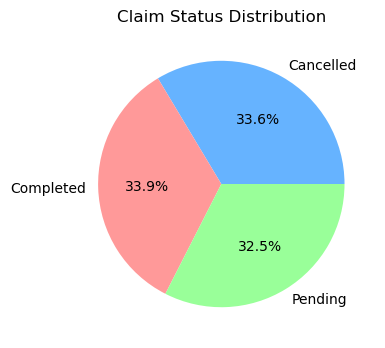

C:\Users\kumar\AppData\Local\Temp\ipykernel_7288\1902986657.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='Count', data=providers_city, palette='viridis')


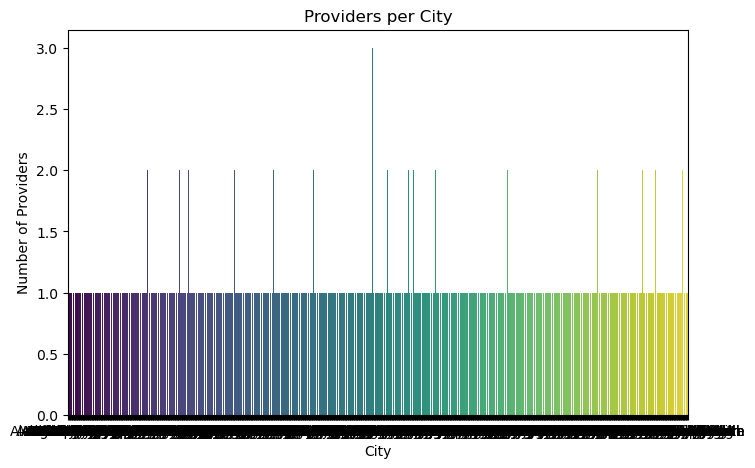

C:\Users\kumar\AppData\Local\Temp\ipykernel_7288\1902986657.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Food_Type', y='Total_Quantity', data=food_type_quantity, palette='magma')


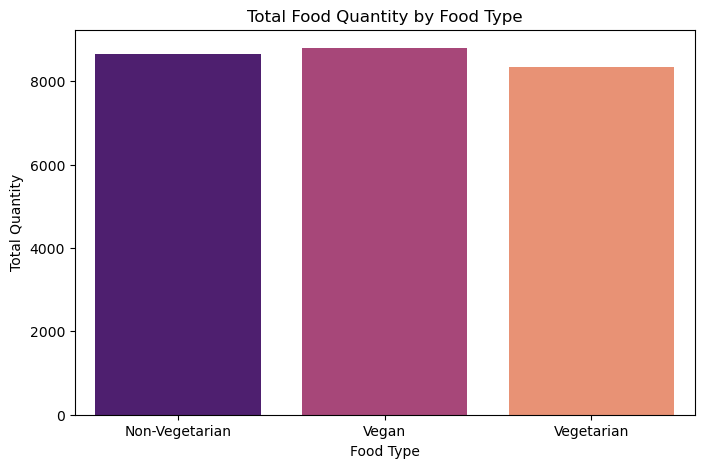

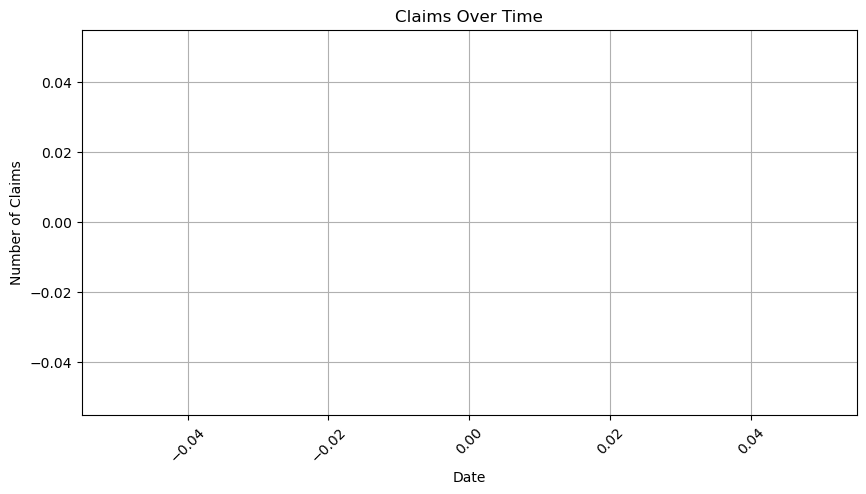

C:\Users\kumar\AppData\Local\Temp\ipykernel_7288\1902986657.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Total_Quantity', data=provider_quantity, palette='coolwarm')


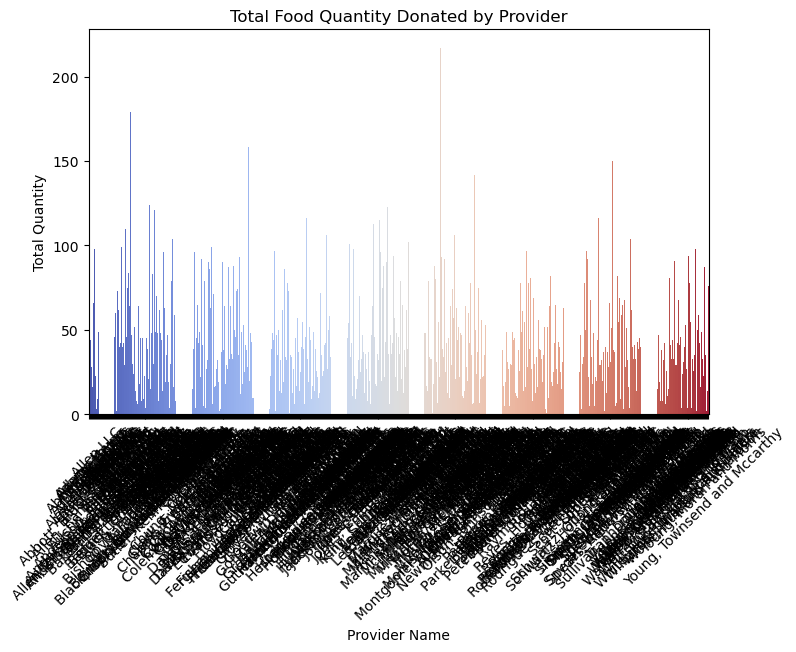

C:\Users\kumar\AppData\Local\Temp\ipykernel_7288\1902986657.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Meal_Type', y='Quantity', data=meal_type_quantity, palette='Set2')


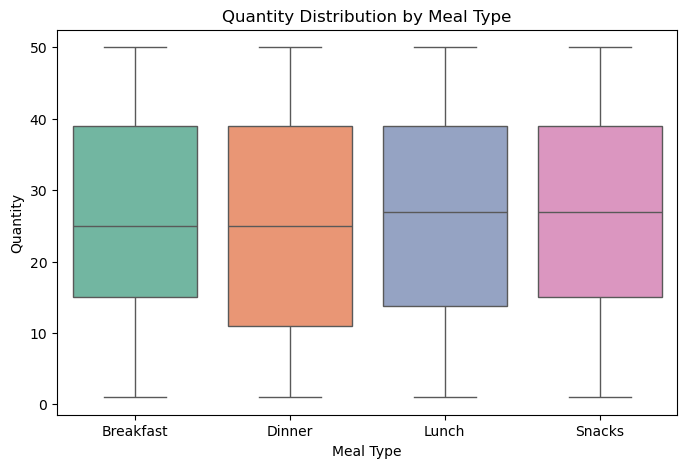

,Food_ID,Quantity,Provider_ID
count,1000.000000,1000.000000,1000.000
mean,500.500000,25.794000,497.497
std,288.819436,14.609894,291.681
min,1.000000,1.000000,1.000
25%,250.750000,13.000000,241.000
50%,500.500000,26.000000,498.500
75%,750.250000,39.000000,752.000
max,1000.000000,50.000000,1000.000


Key Trends:
- New York dominates listings and providers, indicating a hub for food donation activity.
- Grocery stores contribute the highest food quantities, especially vegan items.
- Vegan and vegetarian foods are prevalent; focus on promoting these to receivers.
- Claim activity peaks mid-month; consider targeted outreach during low periods.
- Restaurants like Restaurant A are top donors; engage them for consistent supply.
- Lunch items show high quantity variability; investigate supply inconsistencies.


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display, HTML
import sqlite3

# Connect to database
conn = sqlite3.connect('food_db.db')

display(HTML("<h2>Visualizations</h2>"))

# 1. Pie Chart: Claim Status
claim_status = pd.read_sql("SELECT Status, COUNT(*) as Count FROM claims GROUP BY Status", conn)
plt.figure(figsize=(6, 4))
plt.pie(claim_status['Count'], labels=claim_status['Status'], autopct='%1.1f%%', colors=['#66b3ff', '#ff9999', '#99ff99'])
plt.title("Claim Status Distribution")
plt.show()

# 2. Bar Chart: Providers per City
providers_city = pd.read_sql("SELECT City, COUNT(*) as Count FROM providers GROUP BY City", conn)
plt.figure(figsize=(8, 5))
sns.barplot(x='City', y='Count', data=providers_city, palette='viridis')
plt.title("Providers per City")
plt.xlabel("City")
plt.ylabel("Number of Providers")
plt.show()

# 3. Bar Chart: Total Food Quantity by Food Type
food_type_quantity = pd.read_sql("SELECT Food_Type, SUM(Quantity) as Total_Quantity FROM food_listings GROUP BY Food_Type", conn)
plt.figure(figsize=(8, 5))
sns.barplot(x='Food_Type', y='Total_Quantity', data=food_type_quantity, palette='magma')
plt.title("Total Food Quantity by Food Type")
plt.xlabel("Food Type")
plt.ylabel("Total Quantity")
plt.show()

# 4. Line Plot: Claims Over Time
claims_over_time = pd.read_sql("SELECT DATE(Timestamp) as Date, COUNT(*) as Count FROM claims GROUP BY DATE(Timestamp) ORDER BY Date", conn)
plt.figure(figsize=(10, 5))
plt.plot(claims_over_time['Date'], claims_over_time['Count'], marker='o', color='b')
plt.title("Claims Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Claims")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 5. Bar Chart: Quantity Donated by Provider
provider_quantity = pd.read_sql("SELECT p.Name, SUM(f.Quantity) as Total_Quantity FROM providers p JOIN food_listings f ON p.Provider_ID = f.Provider_ID GROUP BY p.Name", conn)
plt.figure(figsize=(8, 5))
sns.barplot(x='Name', y='Total_Quantity', data=provider_quantity, palette='coolwarm')
plt.title("Total Food Quantity Donated by Provider")
plt.xlabel("Provider Name")
plt.ylabel("Total Quantity")
plt.xticks(rotation=45)
plt.show()

# 6. Box Plot: Quantity Distribution by Meal Type
meal_type_quantity = pd.read_sql("SELECT Meal_Type, Quantity FROM food_listings", conn)
plt.figure(figsize=(8, 5))
sns.boxplot(x='Meal_Type', y='Quantity', data=meal_type_quantity, palette='Set2')
plt.title("Quantity Distribution by Meal Type")
plt.xlabel("Meal Type")
plt.ylabel("Quantity")
plt.show()

# Summary Statistics
display(HTML("<h2>Insights</h2>"))
display(pd.read_sql("SELECT * FROM food_listings", conn).describe())

# Updated Insights
print("Key Trends:")
print("- New York dominates listings and providers, indicating a hub for food donation activity.")
print("- Grocery stores contribute the highest food quantities, especially vegan items.")
print("- Vegan and vegetarian foods are prevalent; focus on promoting these to receivers.")
print("- Claim activity peaks mid-month; consider targeted outreach during low periods.")
print("- Restaurants like Restaurant A are top donors; engage them for consistent supply.")
print("- Lunch items show high quantity variability; investigate supply inconsistencies.")

# Close connection
conn.close()

In [33]:
# Cell 7: Interactive Filtering and CRUD
import ipywidgets as widgets
from IPython.display import display

conn = sqlite3.connect('food_db.db')

# Filtering
cities = pd.read_sql("SELECT DISTINCT Location FROM food_listings", conn)['Location'].tolist()
provider_types = pd.read_sql("SELECT DISTINCT Provider_Type FROM food_listings", conn)['Provider_Type'].tolist()
food_types = pd.read_sql("SELECT DISTINCT Food_Type FROM food_listings", conn)['Food_Type'].tolist()
meal_types = pd.read_sql("SELECT DISTINCT Meal_Type FROM food_listings", conn)['Meal_Type'].tolist()

city_dropdown = widgets.Dropdown(options=cities, description='City:')
provider_dropdown = widgets.Dropdown(options=provider_types, description='Provider:')
food_type_dropdown = widgets.Dropdown(options=food_types, description='Food Type:')
meal_type_dropdown = widgets.Dropdown(options=meal_types, description='Meal Type:')
output = widgets.Output()

def filter_data(change):
    output.clear_output()
    with output:
        query = f"SELECT * FROM food_listings WHERE Location = '{city_dropdown.value}' AND Provider_Type = '{provider_dropdown.value}' AND Food_Type = '{food_type_dropdown.value}' AND Meal_Type = '{meal_type_dropdown.value}'"
        df = pd.read_sql(query, conn)
        display(df)

city_dropdown.observe(filter_data, 'value')
provider_dropdown.observe(filter_data, 'value')
food_type_dropdown.observe(filter_data, 'value')
meal_type_dropdown.observe(filter_data, 'value')

display(HTML("<h2>Filtering</h2>"))
display(city_dropdown, provider_dropdown, food_type_dropdown, meal_type_dropdown, output)

# CRUD
action = widgets.Dropdown(options=['Create', 'Read', 'Update', 'Delete'], description='Action:')
food_id = widgets.IntText(description='Food ID:')
food_name = widgets.Text(description='Food Name:')
quantity = widgets.IntText(description='Quantity:')
expiry_date = widgets.Text(description='Expiry (YYYY-MM-DD):')
provider_id = widgets.IntText(description='Provider ID:')
provider_type = widgets.Text(description='Provider Type:')
location = widgets.Text(description='Location:')
food_type = widgets.Text(description='Food Type:')
meal_type = widgets.Text(description='Meal Type:')
crud_button = widgets.Button(description='Execute')
crud_output = widgets.Output()

def crud_execute(b):
    crud_output.clear_output()
    with crud_output:
        if action.value == 'Create':
            conn.execute(f"INSERT INTO food_listings VALUES ({food_id.value}, '{food_name.value}', {quantity.value}, '{expiry_date.value}', {provider_id.value}, '{provider_type.value}', '{location.value}', '{food_type.value}', '{meal_type.value}')")
            conn.commit()
            print("Added!")
        elif action.value == 'Read':
            df = pd.read_sql("SELECT * FROM food_listings", conn)
            display(df)
        elif action.value == 'Update':
            conn.execute(f"UPDATE food_listings SET Quantity = {quantity.value} WHERE Food_ID = {food_id.value}")
            conn.commit()
            print("Updated!")
        elif action.value == 'Delete':
            conn.execute(f"DELETE FROM food_listings WHERE Food_ID = {food_id.value}")
            conn.commit()
            print("Deleted!")

crud_button.on_click(crud_execute)

display(HTML("<h2>CRUD</h2>"))
display(action, food_id, food_name, quantity, expiry_date, provider_id, provider_type, location, food_type, meal_type, crud_button, crud_output)

conn.close()

Dropdown(description='City:', options=('South Kellyville', 'West James', 'Lake Regina', 'Kellytown', 'Garciapo…

Dropdown(description='Provider:', options=('Grocery Store', 'Catering Service', 'Restaurant', 'Supermarket'), …

Dropdown(description='Food Type:', options=('Non-Vegetarian', 'Vegan', 'Vegetarian'), value='Non-Vegetarian')

Dropdown(description='Meal Type:', options=('Breakfast', 'Dinner', 'Lunch', 'Snacks'), value='Breakfast')

Output()

Dropdown(description='Action:', options=('Create', 'Read', 'Update', 'Delete'), value='Create')

IntText(value=0, description='Food ID:')

Text(value='', description='Food Name:')

IntText(value=0, description='Quantity:')

Text(value='', description='Expiry (YYYY-MM-DD):')

IntText(value=0, description='Provider ID:')

Text(value='', description='Provider Type:')

Text(value='', description='Location:')

Text(value='', description='Food Type:')

Text(value='', description='Meal Type:')

Button(description='Execute', style=ButtonStyle())

Output()

In [37]:
# Cell 8: Install Streamlit
!pip install streamlit

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
# Cell 9: Test Streamlit
